<a href="https://colab.research.google.com/github/AtsushiNi/myLeprecon/blob/master/niihama/compare_slit_width.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 概要
スリット幅を30μmから300μmまで変えて<br>
水素ランプで計測した

In [ ]:
!pip install git+https://github.com/fujiisoup/pyspectra.git
!pip install netCDF4

  Cloning https://github.com/fujiisoup/pyspectra.git to /tmp/pip-req-build-5eov0rk3
  Running command git clone -q https://github.com/fujiisoup/pyspectra.git /tmp/pip-req-build-5eov0rk3
  Created wheel for pyspectra: filename=pyspectra-0.0.1-cp36-none-any.whl size=18787 sha256=fe11c24b296df2bbb8a23a8e56b1d875b94e5fb1154065253f06fa64d3c46fcb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ssd9k_48/wheels/a7/c4/4a/152e6df7ccc3c6838abee31c086e30a3690c80966eb588e7a2
Successfully built pyspectra


In [ ]:
import os
from os.path import join
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyspectra

In [ ]:
data_path = '/content/drive/MyDrive/研究室/myLeprecon/SpectrometerData/20201228_niihama'
image_path = '/content/drive/MyDrive/研究室/images/compare_slit_width'
print(os.path.exists(data_path))

True


In [ ]:
data = []
for file_name in os.listdir(data_path):
  data_array = xr.open_dataarray(join(data_path, file_name))
  data_array['slit_width'] = int(file_name[:-3])
  data_array['pixel'] = data_array['x']
  data.append(data_array.sum('y'))
data = xr.concat(data, dim='slit_width')
data

<xarray.DataArray (slit_width: 5, x: 2048)>
array([[1523889, 1756483, 2028043, ..., 1197006, 1196922, 1197401],
       [1294690, 1298578, 1303923, ..., 1119031, 1117116, 1117140],
       [1212407, 1192684, 1162347, ..., 1074092, 1072682, 1070678],
       [1176749, 1162529, 1137979, ..., 1066414, 1065842, 1064019],
       [1156106, 1145815, 1124667, ..., 1063346, 1062669, 1061981]],
      dtype=uint64)
Coordinates:
    pixel          (x) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
    image_counter  int32 0
  * slit_width     (slit_width) int64 300 200 100 50 30
Dimensions without coordinates: x

In [ ]:
def fit(da):
  popt, perr = pyspectra.fit.singlepeak_fit(da['x'].values, da.values)
  return xr.Dataset({
      'A': popt[0], 'x0': popt[1], 'w': popt[2], 'y0': popt[3],
      'data': da,
      'fit': ('x', pyspectra.profiles.Gauss(da['x'].values, *popt))},
      coords={'x': da['x']})

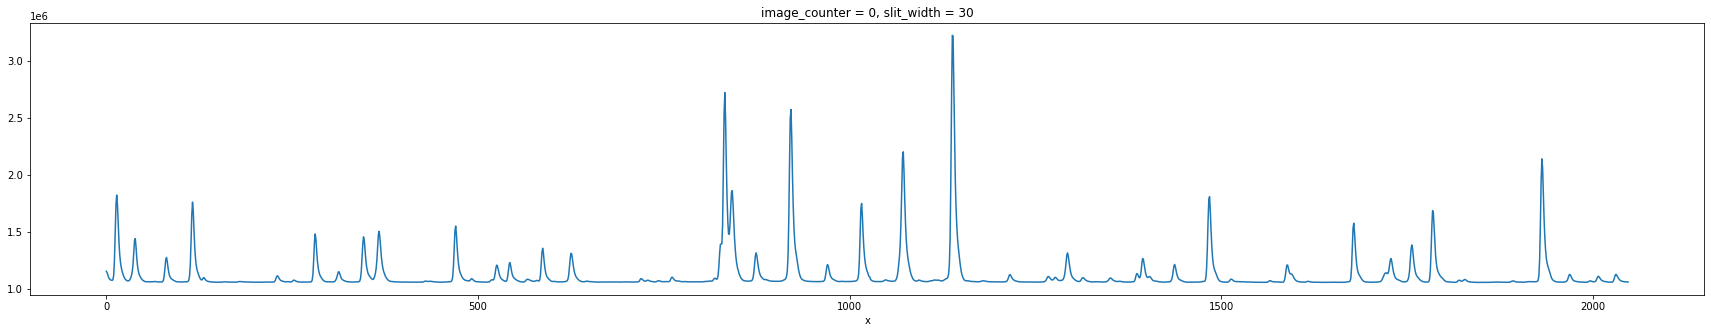

In [ ]:
plt.figure(figsize=(30, 5))
data.sel(slit_width=30).plot()

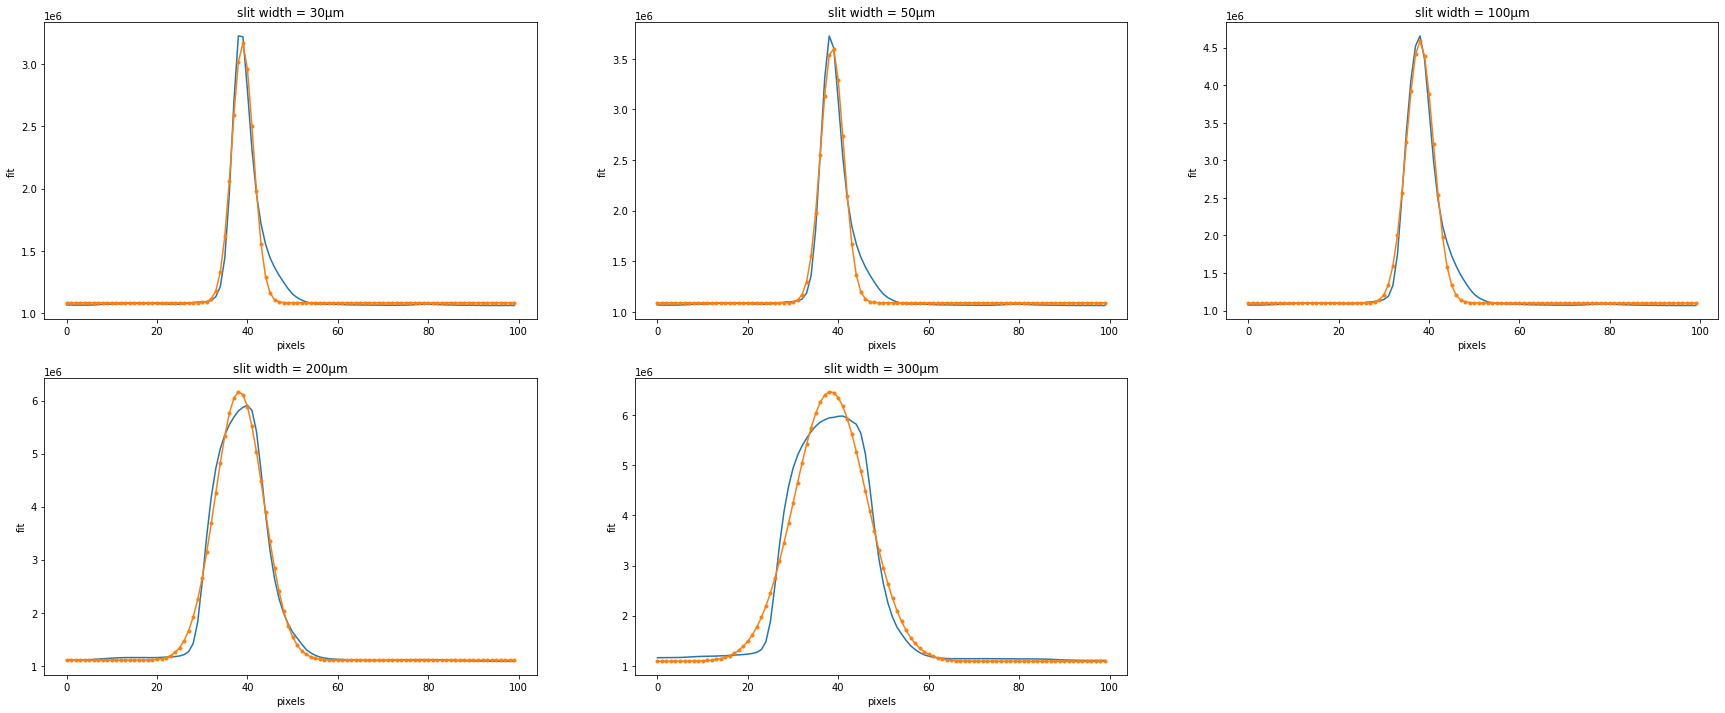

In [ ]:
plt.figure(figsize=(30, 12))
result = fit(data.sel(slit_width=30).sel(x=slice(1100, 1200)))
plt.subplot(2, 3, 1)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 30μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=50).sel(x=slice(1100, 1200)))
plt.subplot(2, 3, 2)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 50μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=100).sel(x=slice(1100, 1200)))
plt.subplot(2, 3, 3)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 100μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=200).sel(x=slice(1100, 1200)))
plt.subplot(2, 3, 4)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 200μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=300).sel(x=slice(1100, 1200)))
plt.subplot(2, 3, 5)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 300μm')
plt.xlabel('pixels')

#plt.savefig(join(image_path, 'five_width_graphs'))

## 半値幅

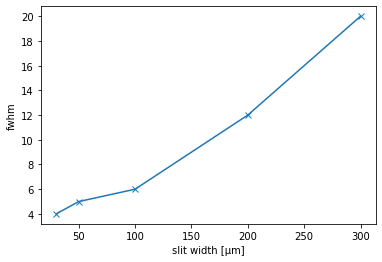

In [ ]:
slits = [30, 50, 100, 200, 300]
fwhm = []

for s in slits:
  d = data.sel(slit_width=s).sel(x=slice(1100, 1200))
  max = d.max('x').values
  min = d.min('x').values
  half = min + (max - min)/2
#  plt.plot(d['pixel'], d, marker='.')
#  plt.plot(d.where(d > half, drop=True)['pixel'], d.where(d > half, drop=True))
  area = d.where(d > half, drop=True)['pixel'].values
  fwhm.append(area[-1]-area[0])
plt.plot(slits, fwhm, marker='x')
plt.xlabel('slit width [μm]')
plt.ylabel('fwhm')
#plt.savefig(join(image_path, 'fwhm'))

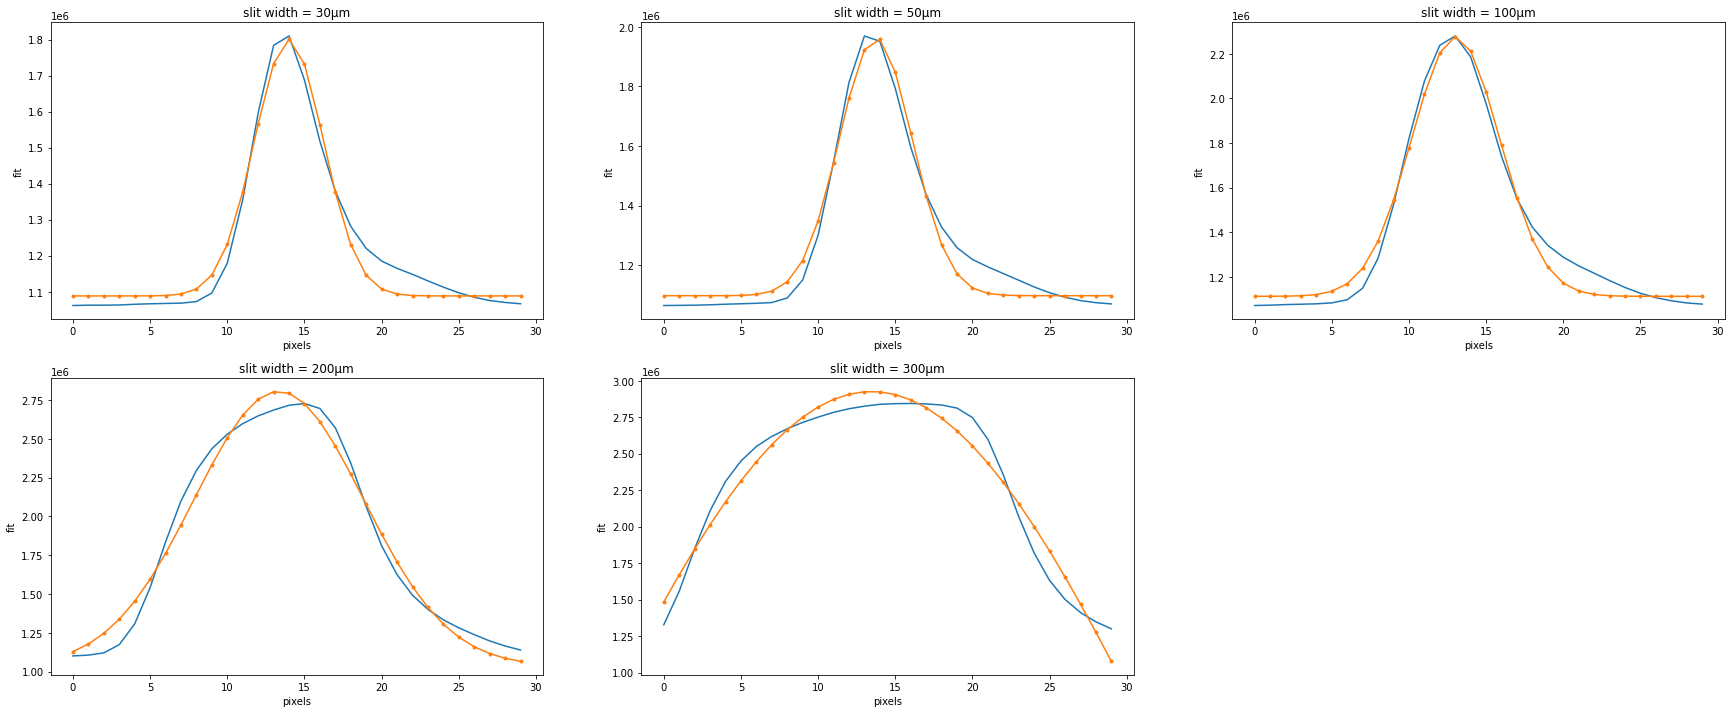

In [ ]:
plt.figure(figsize=(30, 12))
result = fit(data.sel(slit_width=30).sel(x=slice(1470, 1500)))
plt.subplot(2, 3, 1)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 30μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=50).sel(x=slice(1470, 1500)))
plt.subplot(2, 3, 2)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 50μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=100).sel(x=slice(1470, 1500)))
plt.subplot(2, 3, 3)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 100μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=200).sel(x=slice(1470, 1500)))
plt.subplot(2, 3, 4)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 200μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=300).sel(x=slice(1470, 1500)))
plt.subplot(2, 3, 5)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 300μm')
plt.xlabel('pixels')

#plt.savefig(join(image_path, 'five_width_graphs'))

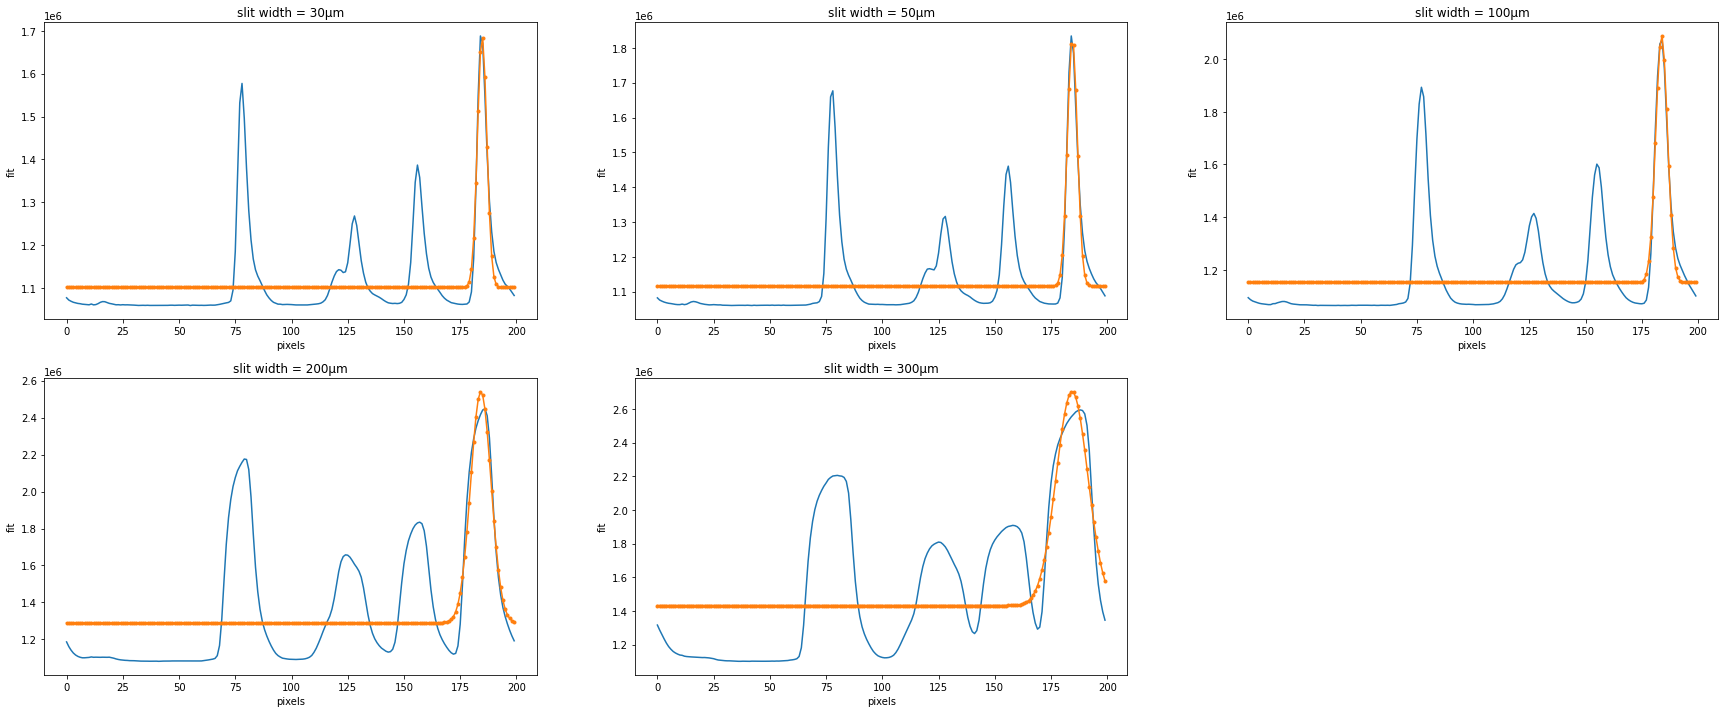

In [ ]:
plt.figure(figsize=(30, 12))
result = fit(data.sel(slit_width=30).sel(x=slice(1600, 1800)))
plt.subplot(2, 3, 1)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 30μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=50).sel(x=slice(1600, 1800)))
plt.subplot(2, 3, 2)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 50μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=100).sel(x=slice(1600, 1800)))
plt.subplot(2, 3, 3)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 100μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=200).sel(x=slice(1600, 1800)))
plt.subplot(2, 3, 4)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 200μm')
plt.xlabel('pixels')
result = fit(data.sel(slit_width=300).sel(x=slice(1600, 1800)))
plt.subplot(2, 3, 5)
result['data'].plot()
result['fit'].plot(marker='.')
plt.title('slit width = 300μm')
plt.xlabel('pixels')

#plt.savefig(join(image_path, 'five_width_graphs'))